# Machine Learning in HealthCare - Diabetes Prediction


## Loading the dataset

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [118]:
X_train = pd.read_csv("C:\personal\data science\coding ninjas\diabetes\Diabetes_XTrain.csv")
y_train = pd.read_csv("C:\personal\data science\coding ninjas\diabetes\Diabetes_YTrain.csv")

In [119]:
X_train.shape

(576, 8)

In [120]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [121]:
y_train.head(5)

,Outcome
0,1
1,0
2,1
3,1
4,0


##### The features considered are Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction and Age. We will now try to see the correlation between these features and outcome to see the effect of said features on the outcome

## Plotting correlation graph using seaborn

In [8]:
data = X_train 

In [10]:
data['target'] = y_train

In [11]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,target
0,7,168,88,42,321,38.2,0.787,40,1
1,8,110,76,0,0,27.8,0.237,58,0
2,7,147,76,0,0,39.4,0.257,43,1
3,2,100,66,20,90,32.9,0.867,28,1
4,4,129,86,20,270,35.1,0.231,23,0


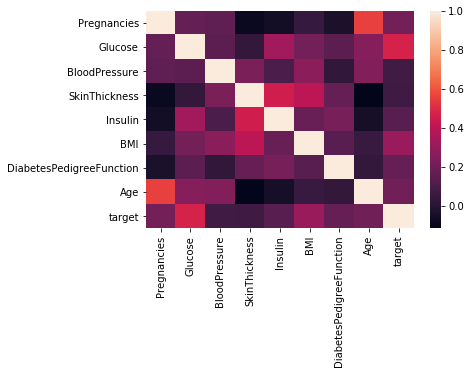

In [124]:
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(corr)

#### We can drop the Skin Thickness and Blood Pressue columns as the correlation is very low

## Applying kNN to improved data set

In [125]:
cols = ['Pregnancies','Glucose','Insulin','BMI','DiabetesPedigreeFunction','Age']
X_train_new = X_train[cols]

In [126]:
print(X_train.shape,X_train_new.shape)

(576, 8) (576, 6)


In [127]:
x_old = X_train.values

In [128]:
x_new = X_train_new.values
y = y_train.values

In [129]:
y = y.reshape(-1,)

In [130]:
from sklearn.neighbors import KNeighborsClassifier

In [214]:
model = KNeighborsClassifier(n_neighbors=3)

In [216]:
model.fit(x_new,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [217]:
model.score(x_new,y)

0.84375

#### 84.3% is the score accquired after selecting appropriate features and setting n_neighbors as 3. We will compare it to result with orignal data and n_neighbors = 5 

In [218]:
model1 = KNeighborsClassifier(n_neighbors=5)

In [219]:
model1.fit(x_old,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [220]:
x_old.shape

(576, 8)

In [221]:
model1.score(x_old,y)

0.7899305555555556

#### The score obtained is 78.9%. 84.3% is an improvement from this hence our exploratory data analysis is providing better results

## Finding test predictions

In [156]:
X_test = pd.read_csv("C:\personal\data science\coding ninjas\diabetes\Diabetes_XTest.csv")

In [157]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               192 non-null    int64  
 1   Glucose                   192 non-null    int64  
 2   BloodPressure             192 non-null    int64  
 3   SkinThickness             192 non-null    int64  
 4   Insulin                   192 non-null    int64  
 5   BMI                       192 non-null    float64
 6   DiabetesPedigreeFunction  192 non-null    float64
 7   Age                       192 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 12.1 KB


In [158]:
X_test = X_test[cols] #To remove columns that arent necessary in test data and match training data dimensions

In [159]:
print(X_test.shape,X_train_new.shape)

(192, 6) (576, 6)


In [160]:
x = X_test.values

In [211]:
y_pred = model.predict(x)

In [212]:
df = pd.DataFrame(y_pred)

In [213]:
sumbit = df.to_csv('C:\personal\data science\coding ninjas\diabetes\mysubmission3.csv',index = False)